# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-11-201-MIA-rep1_CRR_DiadFit,103.334480,0.011161,1285.697073,0.010047,235.446098,1285.697073,405.907698,0.658412,3.060179,...,1.058824,0.160154,0.005593,1.027190,1.043764,0.030756,0.002757,PseudoVoigtModel,PseudoVoigtModel,No
1,186-11-201-MIA-rep2,103.305113,0.013735,1285.738256,0.012039,175.157761,1285.738256,323.274958,0.682279,2.624693,...,1.086081,0.033527,0.007790,1.003086,1.002179,0.003396,0.003464,PseudoVoigtModel,PseudoVoigtModel,No
2,186-11-201-MIA-rep3_CRR_DiadFit,103.351876,0.014427,1285.646809,0.012947,167.847270,1285.646809,296.211223,0.674482,2.671793,...,1.044527,0.096849,0.008037,1.081505,1.071910,0.090760,0.003623,PseudoVoigtModel,PseudoVoigtModel,No
3,186-11-201-MIA-rep4_CRR_DiadFit,103.312813,0.016277,1285.715264,0.013341,131.820455,1285.715264,230.503738,0.650993,2.139776,...,1.074427,0.176421,0.009877,1.029240,1.025370,0.034056,0.005061,PseudoVoigtModel,PseudoVoigtModel,No
4,186-11-202-MIA-rep1_CRR_DiadFit,102.998770,0.014073,1286.569477,0.012236,145.465132,1286.569477,158.501270,0.455872,2.309664,...,1.232353,0.157197,0.006268,1.012146,1.012232,0.010152,0.003602,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','broad','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'03 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 42/42 [00:06<00:00,  6.50it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"August 29, 2024\n",August,29.0,6.000,45.0,5.0,50.0,"['0h', '3m', '46s']",12:01:25 PM\n,43285.0,1324.964
1,186-11-201-MIA-rep1.txt,"August 29, 2024\n",August,29.0,12.014,60.0,4.0,50.0,"['0h', '4m', '2s']",1:17:27 PM\n,47847.0,1324.964
2,186-11-201-MIA-rep2.txt,"August 29, 2024\n",August,29.0,12.019,60.0,4.0,50.0,"['0h', '4m', '1s']",1:22:40 PM\n,48160.0,1324.964
3,186-11-201-MIA-rep3.txt,"August 29, 2024\n",August,29.0,12.014,60.0,4.0,50.0,"['0h', '4m', '1s']",1:39:45 PM\n,49185.0,1324.964
4,186-11-201-MIA-rep4.txt,"August 29, 2024\n",August,29.0,12.006,60.0,4.0,50.0,"['0h', '4m', '1s']",1:44:10 PM\n,49450.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', '186-11-201-MIA-rep1', '186-11-201-MIA-rep2',
       '186-11-201-MIA-rep3', '186-11-201-MIA-rep4',
       '186-11-202-MIA-rep1', '186-11-202-MIA-rep2',
       '186-11-202-MIA-rep3', '186-11-203-MIA-rep1',
       '186-11-203-MIA-rep2', '186-11-203-MIA-rep3',
       '186-11-203-MIB-rep1', '186-11-203-MIB-rep2',
       '186-11-203-MIB-rep3', '187-9-219-MIA-49mw-rep1',
       '187-9-219-MIA-49mw-rep2', '187-9-219-MIA-49mw-rep3',
       '186-11-204-MIA-rep1', '186-11-204-MIA-rep2',
       '186-11-204-MIA-rep3', '186-11-205-MIA-rep1',
       '186-11-205-MIA-rep2', '186-11-205-MIA-rep3', 'FG04-A1-4-end'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-11-201-MIA-rep1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-11-201-MIA-rep1', '186-11-201-MIA-rep2',
       '186-11-201-MIA-rep3', '186-11-201-MIA-rep4',
       '186-11-202-MIA-rep1', '186-11-202-MIA-rep2',
       '186-11-202-MIA-rep3', '186-11-203-MIA-rep1',
       '186-11-203-MIA-rep2', '186-11-203-MIA-rep3',
       '186-11-203-MIB-rep1', '186-11-203-MIB-rep2',
       '186-11-203-MIB-rep3', '187-9-219-MIA-49mw-rep1',
       '187-9-219-MIA-49mw-rep2', '187-9-219-MIA-49mw-rep3',
       '186-11-204-MIA-rep3', '186-11-205-MIA-rep1',
       '186-11-205-MIA-rep2', '186-11-205-MIA-rep3',
       '186-11-204-MIA-rep1', '186-11-204-MIA-rep2', 'FG04-A1-4-start',
       'FG04-A1-4-end'], dtype='<U23')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-11-201-MIA-rep1,103.334480,0.011161,1285.697073,0.010047,235.446098,1285.697073,405.907698,0.658412,3.060179,...,August,29.0,12.014,60.0,4.0,50.0,"['0h', '4m', '2s']",1:17:27 PM\n,47847.0,1324.964
1,186-11-201-MIA-rep2,103.305113,0.013735,1285.738256,0.012039,175.157761,1285.738256,323.274958,0.682279,2.624693,...,August,29.0,12.019,60.0,4.0,50.0,"['0h', '4m', '1s']",1:22:40 PM\n,48160.0,1324.964
2,186-11-201-MIA-rep3,103.351876,0.014427,1285.646809,0.012947,167.847270,1285.646809,296.211223,0.674482,2.671793,...,August,29.0,12.014,60.0,4.0,50.0,"['0h', '4m', '1s']",1:39:45 PM\n,49185.0,1324.964
3,186-11-201-MIA-rep4,103.312813,0.016277,1285.715264,0.013341,131.820455,1285.715264,230.503738,0.650993,2.139776,...,August,29.0,12.006,60.0,4.0,50.0,"['0h', '4m', '1s']",1:44:10 PM\n,49450.0,1324.964
4,186-11-202-MIA-rep1,102.998770,0.014073,1286.569477,0.012236,145.465132,1286.569477,158.501270,0.455872,2.309664,...,August,29.0,12.017,60.0,4.0,50.0,"['0h', '4m', '1s']",2:39:57 PM\n,52797.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.1617508758059633e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,186-11-201-MIA-rep1,0.147235,0.005902,0.004437,0.003891,103.121835,0.011198,0.001156,0.011161,12.014,...,60.0,4.0,50.0,"['0h', '4m', '2s']",1:17:27 PM\n,47847.0,47847.0,0.997942,0.997931,0.997953
1,186-11-201-MIA-rep2,0.135591,0.006678,0.005450,0.003860,103.092449,0.013755,0.001154,0.013735,12.019,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:22:40 PM\n,48160.0,48160.0,0.997941,0.997930,0.997953
2,186-11-201-MIA-rep3,0.153979,0.006933,0.005723,0.003913,103.138856,0.014443,0.001148,0.014427,12.014,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:39:45 PM\n,49185.0,49185.0,0.997939,0.997928,0.997950
3,186-11-201-MIA-rep4,0.138506,0.007523,0.006452,0.003867,103.099806,0.016284,0.001147,0.016277,12.006,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:44:10 PM\n,49450.0,49450.0,0.997938,0.997927,0.997949
4,186-11-202-MIA-rep1,0.013992,0.006832,0.005583,0.003938,102.785566,0.014090,0.001140,0.014073,12.017,...,60.0,4.0,50.0,"['0h', '4m', '1s']",2:39:57 PM\n,52797.0,52797.0,0.997930,0.997919,0.997941


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.1617508758059633e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,186-11-201-MIA-rep1,0.147235,0.005902,0.004437,0.003891,103.121835,0.011198,0.001156,0.011161,12.014,...,60.0,4.0,50.0,"['0h', '4m', '2s']",1:17:27 PM\n,47847.0,47847.0,0.997942,0.997931,0.997953
1,186-11-201-MIA-rep2,0.135591,0.006678,0.005450,0.003860,103.092449,0.013755,0.001154,0.013735,12.019,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:22:40 PM\n,48160.0,48160.0,0.997941,0.997930,0.997953
2,186-11-201-MIA-rep3,0.153979,0.006933,0.005723,0.003913,103.138856,0.014443,0.001148,0.014427,12.014,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:39:45 PM\n,49185.0,49185.0,0.997939,0.997928,0.997950
3,186-11-201-MIA-rep4,0.138506,0.007523,0.006452,0.003867,103.099806,0.016284,0.001147,0.016277,12.006,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:44:10 PM\n,49450.0,49450.0,0.997938,0.997927,0.997949
4,186-11-202-MIA-rep1,0.013992,0.006832,0.005583,0.003938,102.785566,0.014090,0.001140,0.014073,12.017,...,60.0,4.0,50.0,"['0h', '4m', '1s']",2:39:57 PM\n,52797.0,52797.0,0.997930,0.997919,0.997941


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 29, 2024_fitted_2024-09-19.xlsx


## This helps visualize the errors on each spectra 

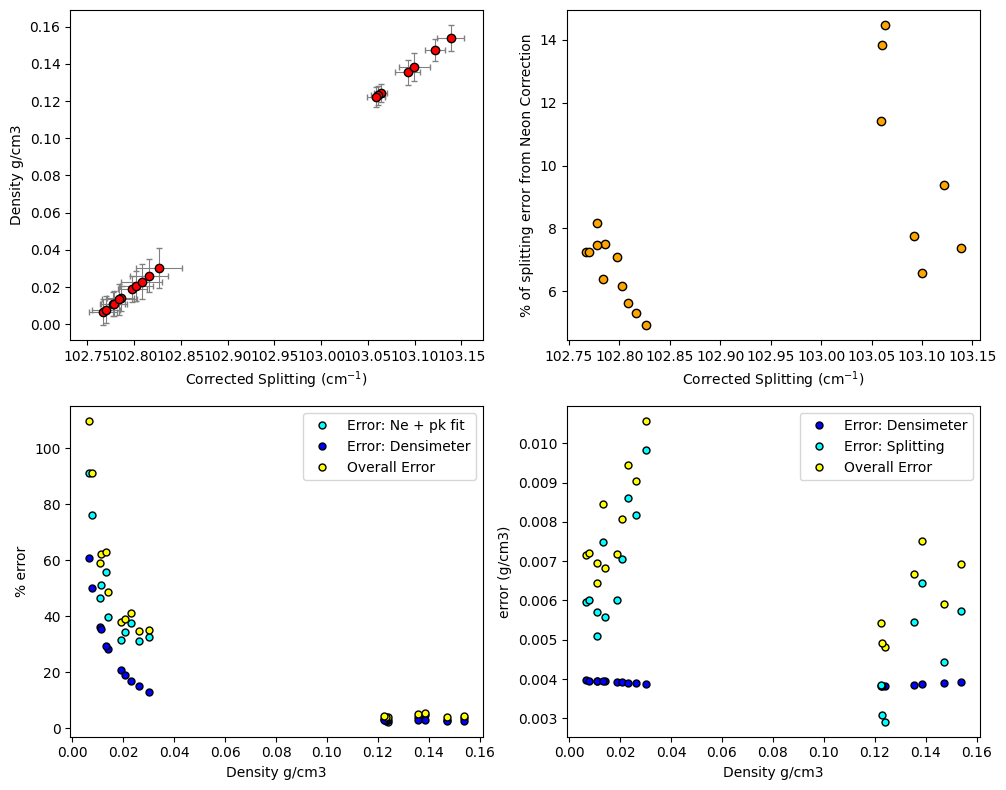

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [17]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,186-11-201-MIA-rep1,0.147235,0.005902,0.004437,0.003891,103.121835,0.011198,0.001156,0.011161,12.014,...,60.0,4.0,50.0,"['0h', '4m', '2s']",1:17:27 PM\n,47847.0,47847.0,0.997942,0.997931,0.997953
1,186-11-201-MIA-rep2,0.135591,0.006678,0.005450,0.003860,103.092449,0.013755,0.001154,0.013735,12.019,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:22:40 PM\n,48160.0,48160.0,0.997941,0.997930,0.997953
2,186-11-201-MIA-rep3,0.153979,0.006933,0.005723,0.003913,103.138856,0.014443,0.001148,0.014427,12.014,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:39:45 PM\n,49185.0,49185.0,0.997939,0.997928,0.997950
3,186-11-201-MIA-rep4,0.138506,0.007523,0.006452,0.003867,103.099806,0.016284,0.001147,0.016277,12.006,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:44:10 PM\n,49450.0,49450.0,0.997938,0.997927,0.997949
4,186-11-202-MIA-rep1,0.013992,0.006832,0.005583,0.003938,102.785566,0.014090,0.001140,0.014073,12.017,...,60.0,4.0,50.0,"['0h', '4m', '1s']",2:39:57 PM\n,52797.0,52797.0,0.997930,0.997919,0.997941
5,186-11-202-MIA-rep2,0.010942,0.006450,0.005099,0.003950,102.777870,0.012869,0.001141,0.012845,12.011,...,60.0,4.0,50.0,"['0h', '4m', '1s']",2:44:33 PM\n,53073.0,53073.0,0.997929,0.997918,0.997940
7,186-11-203-MIA-rep1,0.018986,0.007173,0.006007,0.003921,102.798172,0.015160,0.001154,0.015147,12.024,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:21:46 PM\n,55306.0,55306.0,0.997924,0.997913,0.997935
8,186-11-203-MIA-rep2,0.026123,0.009053,0.008171,0.003897,102.816183,0.020622,0.001159,0.020632,12.014,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:31:20 PM\n,55880.0,55880.0,0.997922,0.997911,0.997934
9,186-11-203-MIA-rep3,0.011135,0.006943,0.005711,0.003949,102.778356,0.014412,0.001162,0.014395,12.016,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:38:03 PM\n,56283.0,56283.0,0.997921,0.997910,0.997933
10,186-11-203-MIB-rep1,0.020586,0.008063,0.007048,0.003915,102.802210,0.017787,0.001169,0.017786,12.046,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:48:48 PM\n,56928.0,56928.0,0.997920,0.997909,0.997931


In [18]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,186-11-201-MIA-rep1,0.147235,0.005902,0.004437,0.003891,103.121835,0.011198,0.001156,0.011161,12.014,...,60.0,4.0,50.0,"['0h', '4m', '2s']",1:17:27 PM\n,47847.0,47847.0,0.997942,0.997931,0.997953
1,186-11-201-MIA-rep2,0.135591,0.006678,0.005450,0.003860,103.092449,0.013755,0.001154,0.013735,12.019,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:22:40 PM\n,48160.0,48160.0,0.997941,0.997930,0.997953
2,186-11-201-MIA-rep3,0.153979,0.006933,0.005723,0.003913,103.138856,0.014443,0.001148,0.014427,12.014,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:39:45 PM\n,49185.0,49185.0,0.997939,0.997928,0.997950
3,186-11-201-MIA-rep4,0.138506,0.007523,0.006452,0.003867,103.099806,0.016284,0.001147,0.016277,12.006,...,60.0,4.0,50.0,"['0h', '4m', '1s']",1:44:10 PM\n,49450.0,49450.0,0.997938,0.997927,0.997949
4,186-11-202-MIA-rep1,0.013992,0.006832,0.005583,0.003938,102.785566,0.014090,0.001140,0.014073,12.017,...,60.0,4.0,50.0,"['0h', '4m', '1s']",2:39:57 PM\n,52797.0,52797.0,0.997930,0.997919,0.997941
5,186-11-202-MIA-rep2,0.010942,0.006450,0.005099,0.003950,102.777870,0.012869,0.001141,0.012845,12.011,...,60.0,4.0,50.0,"['0h', '4m', '1s']",2:44:33 PM\n,53073.0,53073.0,0.997929,0.997918,0.997940
7,186-11-203-MIA-rep1,0.018986,0.007173,0.006007,0.003921,102.798172,0.015160,0.001154,0.015147,12.024,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:21:46 PM\n,55306.0,55306.0,0.997924,0.997913,0.997935
8,186-11-203-MIA-rep2,0.026123,0.009053,0.008171,0.003897,102.816183,0.020622,0.001159,0.020632,12.014,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:31:20 PM\n,55880.0,55880.0,0.997922,0.997911,0.997934
9,186-11-203-MIA-rep3,0.011135,0.006943,0.005711,0.003949,102.778356,0.014412,0.001162,0.014395,12.016,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:38:03 PM\n,56283.0,56283.0,0.997921,0.997910,0.997933
10,186-11-203-MIB-rep1,0.020586,0.008063,0.007048,0.003915,102.802210,0.017787,0.001169,0.017786,12.046,...,60.0,4.0,50.0,"['0h', '4m', '1s']",3:48:48 PM\n,56928.0,56928.0,0.997920,0.997909,0.997931


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

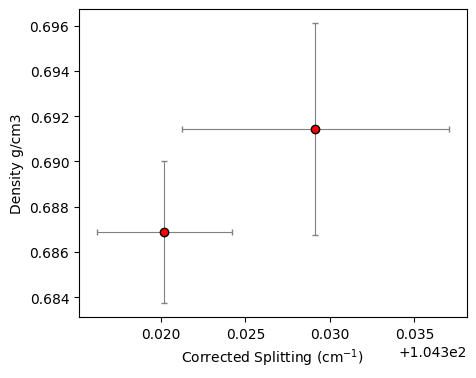

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [20]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

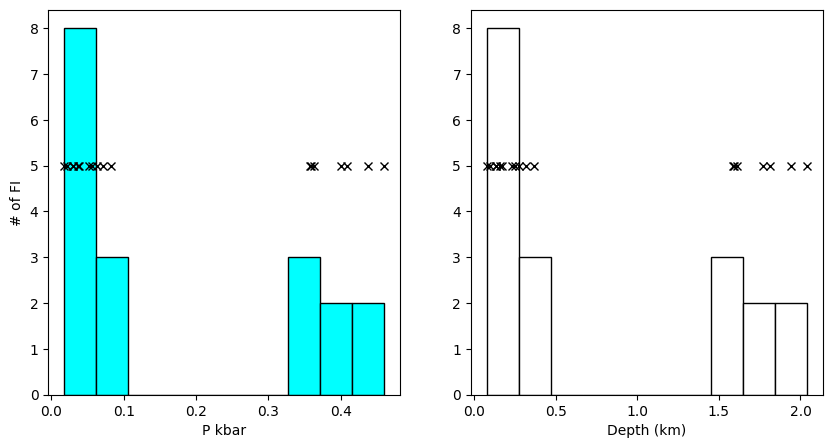

In [21]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')